In [157]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
UberData=pd.read_csv('C:/Users/kamal1/Documents/Tutorial/Uber Request Data.csv',encoding = 'ISO-8859-1')
UberData.head()


,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Checking null values at columns

In [159]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null object
Drop_timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


* As we can see there are null values in some of the columns

In [160]:
len(UberData['Request_id'].unique().tolist())

6745

In [161]:
len(UberData['Driver id'].unique().tolist())

301

In [162]:
#UberData_1=UberData[~np.isnan(UberData['Driver id'])]
UberData['Request_timestamp'] = pd.to_datetime(UberData['Request_timestamp'])
UberData['Drop_timestamp'] = pd.to_datetime(UberData['Drop_timestamp'])
UberData.head()


,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [163]:
UberData['Day'] = UberData['Request_timestamp'].dt.day
UberData['Hour'] = UberData['Request_timestamp'].dt.hour
UberData.head()

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Day,Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8


### Still we can see there are some values null in Uber. This values are due to non availability of can etc


In [39]:
UberData=UberData.sort_values(['Hour'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
UberData1=UberData.sort_values(['Day'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [164]:
#UberData1=UberData.groupby(['Hour'])['Request_id'].count()
UberData.to_csv('UberData_Validation1.csv',index=False)
CountVal = UberData.Hour.unique()
CountVal_Day=UberData1.Day.unique()
CountVal_Day


array([ 7, 13, 14, 15], dtype=int64)

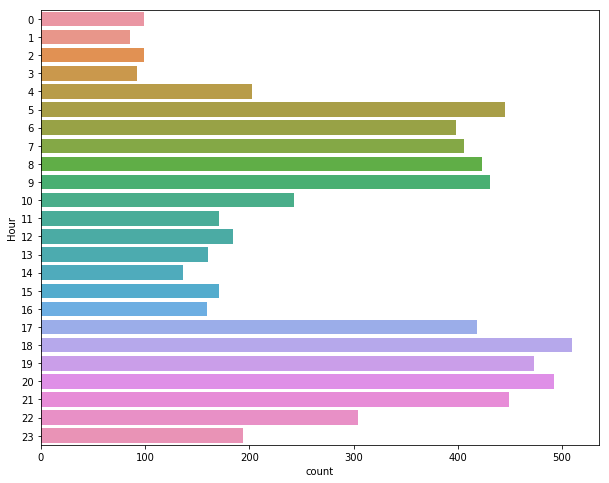

In [9]:
plt.figure(figsize=(10, 8))
sns.countplot(y="Hour", data=UberData)
plt.show()

In [216]:
counts = UberData.groupby(['Hour','Status']).count()
SelectedColumns_Hours=UberData.iloc[:, [0,3,7]]
SelectedColumns_Day=UberData.iloc[:, [0,3,6]]
# first two columns of data frame with all rows
#counts
#totals = counts.sum(level=0)
#It generally delete the first row
SelectedColumns_Hours
counts = SelectedColumns_Hours.groupby(['Hour','Status']).count()
counts_Day = SelectedColumns_Day.groupby(['Day','Status']).count()


Text(0,0.5,'Count')

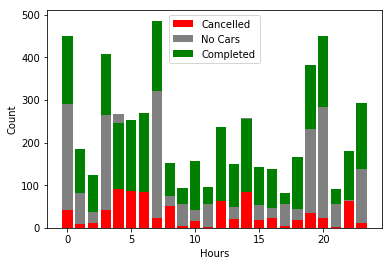

In [211]:
# Using this we can calculate individual request at hour
counts1 = counts.unstack(level=1)
counts1.columns = counts1.columns.droplevel(level=0)
counts1 = counts1.fillna(0)
#counts1.to_csv('counts111.csv')
plt.bar(CountVal, counts1['Cancelled'], bottom=None, color='red', label='Cancelled')
plt.bar(CountVal, counts1['No Cars Available'], bottom=counts1['Cancelled'], color='grey', label='No Cars')
plt.bar(CountVal, counts1['Trip Completed'], bottom=counts1['No Cars Available'], color='green', label='Completed')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Count')

In [215]:
SelectedColumns_Pickup=UberData.iloc[:, [1,4]]
SelectedColumns_Pickup
counts_Pickup = SelectedColumns_Pickup.groupby(['Pickup_point']).count()
counts_Pickup


,Request_timestamp
Pickup_point,
Airport,3238
City,3507


In [173]:
UberData['TimeSlot'] = np.where(UberData['Hour'] < 5,"Early",
np.where(UberData['Hour'] < 10,"Mor/Rush",np.where(UberData['Hour'] < 17,"Day_Time",
np.where(UberData['Hour']< 22,"Evning_Rush","Night"))))
#UberData3=UberData.sort(['TimeSlot'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
UberData3=UberData.sort_values('TimeSlot', ascending=True)
CountVal_Slot=UberData3.TimeSlot.unique()
CountVal_Slot





array(['Day_Time', 'Early', 'Evning_Rush', 'Mor/Rush', 'Night'],
      dtype=object)

Status       Cancelled  No Cars Available  Trip Completed
TimeSlot                                                 
Day_Time           168                334             722
Early               65                299             214
Evning_Rush        166               1392             784
Mor/Rush           843                406             854
Night               22                219             257


Text(0,0.5,'Count')

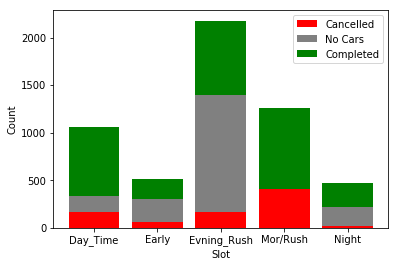

In [128]:
Selected_Slots=UberData.iloc[:, [0,3,8]]
totals = Selected_Slots.sum(level=0)
counts_Slots = Selected_Slots.groupby(['TimeSlot','Status']).count()

Slots = counts_Slots.unstack(level=1)
Slots.columns = Slots.columns.droplevel(level=0)
print(Slots)
plt.bar(CountVal_Slot, Slots['Cancelled'], bottom=None, color='red', label='Cancelled')
plt.bar(CountVal_Slot, Slots['No Cars Available'], bottom=Slots['Cancelled'], color='grey', label='No Cars')
plt.bar(CountVal_Slot, Slots['Trip Completed'], bottom=Slots['No Cars Available'], color='green', label='Completed')
plt.legend()
plt.xlabel('Slot')
plt.ylabel('Count')



**DayTime: We are having most no of trips as completed. Cancellation is also less.Supply gap is present there

**Early Morning: We are having less supply. Completed trips are less as compared other factors

**Eavning: We are having very less supply or demand can be more. Completed trips are less as compared other factors

**Morning/Rush: We are having more trips completed and cancelled too. 


In [129]:
counts_Slots

Request_id
TimeSlot    Status                       
Day_Time    Cancelled                 168
            No Cars Available         334
            Trip Completed            722
Early       Cancelled                  65
            No Cars Available         299
            Trip Completed            214
Evning_Rush Cancelled                 166
            No Cars Available        1392
            Trip Completed            784
Mor/Rush    Cancelled                 843
            No Cars Available         406
            Trip Completed            854
Night       Cancelled                  22
            No Cars Available         219
            Trip Completed            257

Day_Time
Early
Evning_Rush
Mor/Rush
Night


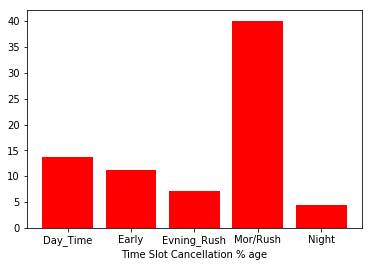

In [202]:
counts_Slots1=counts_Slots.groupby('TimeSlot').Request_id.sum() 
counts_Slots = Selected_Slots.groupby(['TimeSlot','Status']).count()
Slots = counts_Slots.unstack(level=1)
Slots.columns = Slots.columns.droplevel(level=0)
#print(Slots)
#print(counts_Slots1)
UberData3=UberData.sort_values('TimeSlot', ascending=True)
CountVal11=UberData3.TimeSlot.unique()
for i in CountVal11:
    print(i)
    #print(Slots['Cancelled'][i]/counts_Slots1[i])
    Val1=i
    plt.bar(i, (Slots['Cancelled'][i]/counts_Slots1[i])*100, bottom=None, color='red', label='Cancelled')
    plt.xlabel('Time Slot Cancellation % age')

#print(CountVal_Slot)
#counts_Slots1

Day_Time
Early
Evning_Rush
Mor/Rush
Night


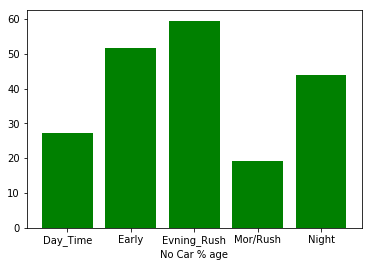

In [217]:

for i in CountVal11:
    print(i)
    #print(Slots['Cancelled'][i]/counts_Slots1[i])
    Val1=i
    plt.bar(i, (Slots['No Cars Available'][i]/counts_Slots1[i])*100, bottom=None, color='green', label='Cancelled')
    plt.xlabel('No Car % age')

#print(CountVal_Slot)
#counts_Slots1